## [Load image data](https://huggingface.co/docs/datasets/main/en/image_load)

c:\Users\hiroga\miniconda3\envs\huggingface-datasets-vision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 128/128 [00:00<00:00, 5684.90 examples/s]


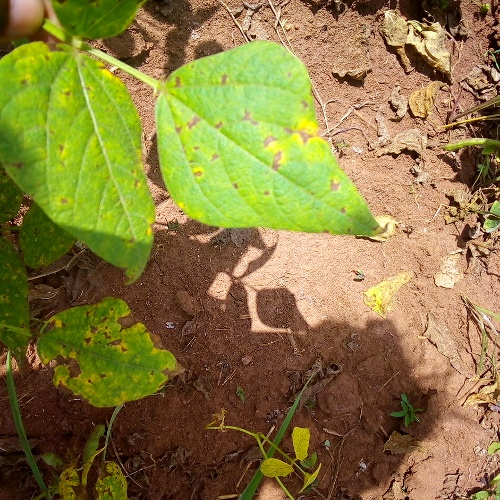

In [1]:
from datasets import load_dataset, Image

dataset = load_dataset("beans", split="train")
dataset[0]["image"]

In [3]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="data/pokemon")
print(dataset)
dataset["train"][0]

Resolving data files: 100%|██████████| 37/37 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 37
    })
})


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x694>}

In [5]:
# `ImageFolder`を用いず、パスをいきなり指定しても読み込める
dataset = load_dataset("data/pokemon")
print(dataset)

Resolving data files: 100%|██████████| 37/37 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 37
    })
})


## [Create an image dataset](https://huggingface.co/docs/datasets/main/en/image_dataset)

In [15]:
# フォルダが `区分`/`クラス`の形式である場合、ImageFolderは自動でラベルを付与する...と思っていたが、そんなことないのか？
import os

for root, dirs, files in os.walk("data/animal"):
    print(root, dirs, files)

dataset = load_dataset("imagefolder", data_dir="data/animal")
print(dataset)

data/animal ['train'] []
data/animal\train ['dog'] []
data/animal\train\dog [] ['Golden_Retriever_Dukedestiny01_drvd.jpg']
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 1
    })
})


In [16]:
# 少なくとも、`metadata.csv`を用意することで、ラベルを付与できる
import os

for root, dirs, files in os.walk("data/animal"):
    print(root, dirs, files)

dataset = load_dataset("imagefolder", data_dir="data/animal")
print(dataset)

data/animal ['train'] []
data/animal\train ['dog'] []
data/animal\train\dog [] ['Golden_Retriever_Dukedestiny01_drvd.jpg', 'metadata.csv']
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1
    })
})
